## 01. Advertizing EDA( Exploratory Data Analysis)

### Task:
+ Descriptive statistics (Mean, Median, Variance)
+ Histogram and box diagram


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

+ The data-set has **200 row** and **5 column**( [Unnamed, TV, Radio, Newspaper, Sales]).
+ **Data types** are integer and float, there is **no null value**.


In [4]:
df = pd.read_csv("advertising_Dataset.csv")
print("shape of Dataset is : ",df.shape)
df.head()

shape of Dataset is :  (200, 5)


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


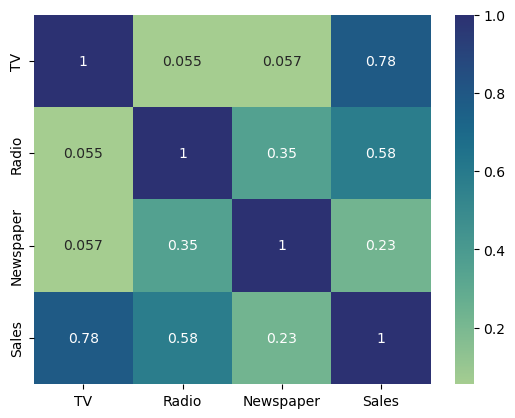

In [8]:
corr_matrix = df[["TV", "Radio", "Newspaper", "Sales"]].corr()
sns.heatmap(corr_matrix, cmap="crest", annot=True)
plt.show()

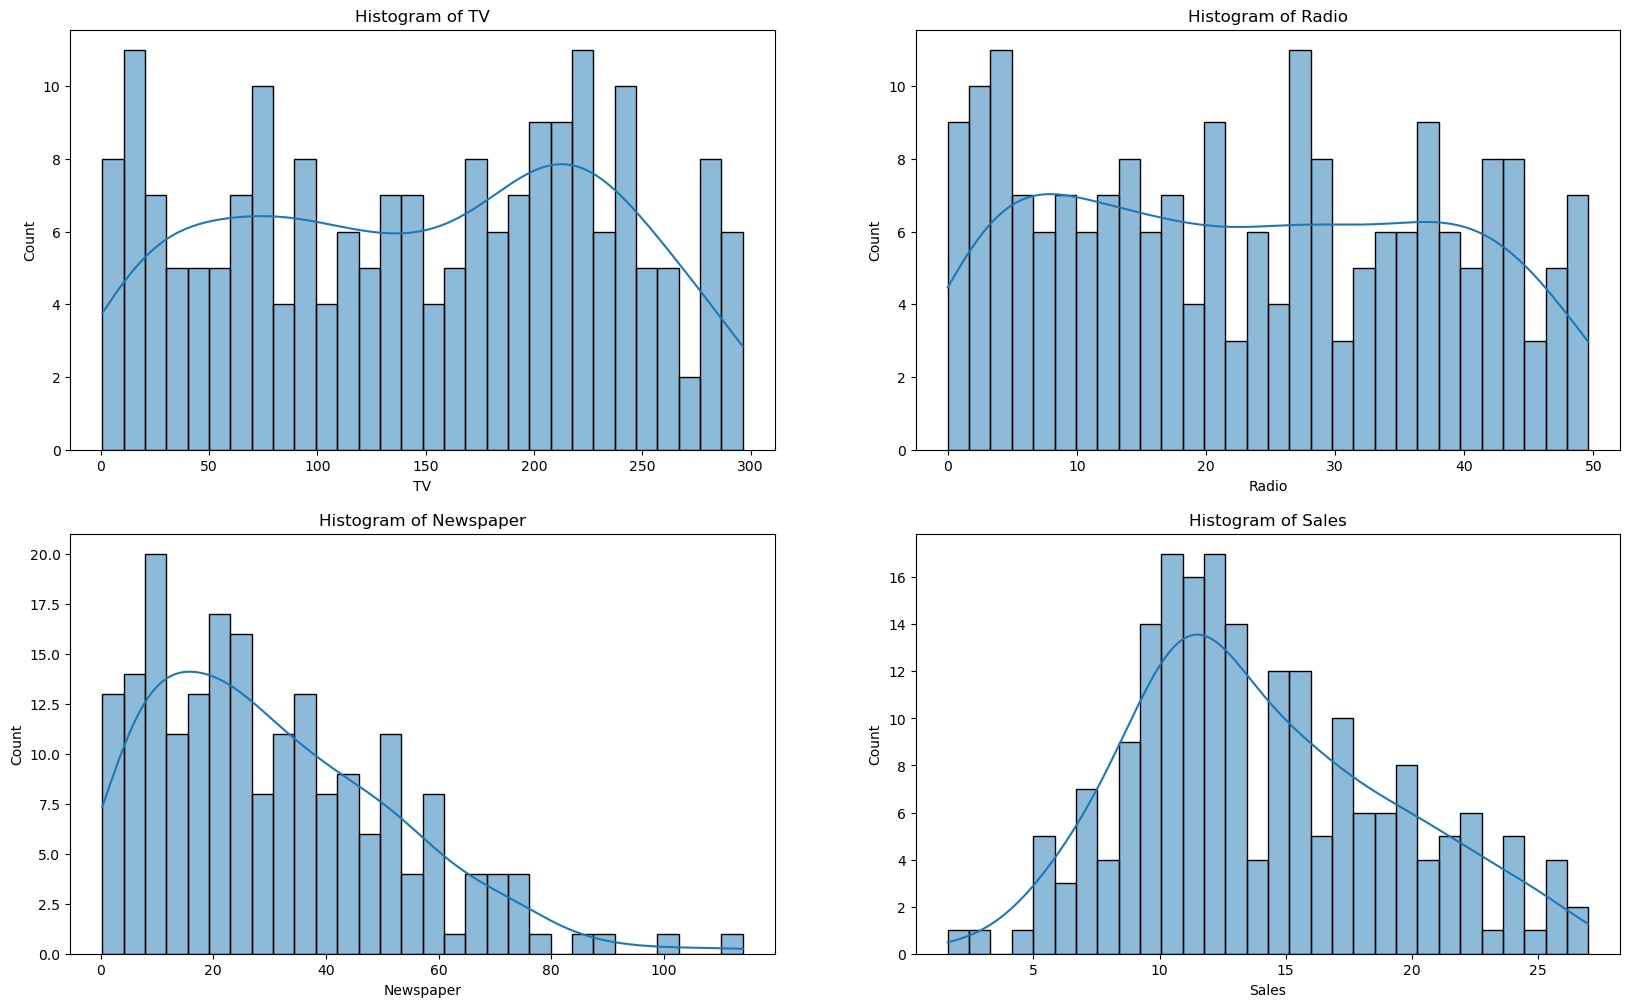

In [9]:

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
sns.histplot(df.TV, bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title('Histogram of TV')

sns.histplot(df.Radio, bins=30, kde=True, ax=axes[0,1])
axes[0,1].set_title('Histogram of Radio')

sns.histplot(df.Newspaper, bins=30, kde=True, ax=axes[1,0])
axes[1,0].set_title('Histogram of Newspaper')

sns.histplot(df.Sales, bins=30, kde=True, ax=axes[1,1])
axes[1,1].set_title('Histogram of Sales')

plt.show()

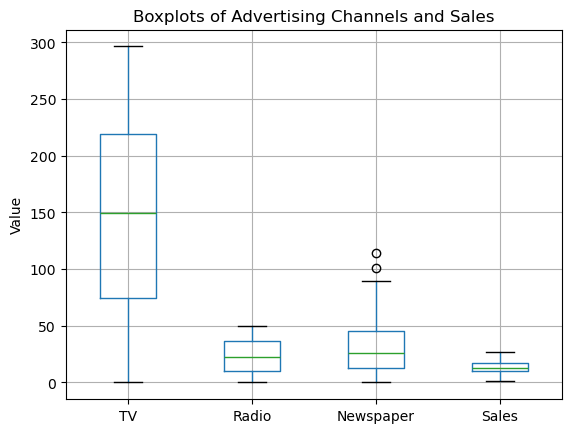

In [10]:
df[["TV", "Radio", "Newspaper", "Sales"]].boxplot()
plt.title("Boxplots of Advertising Channels and Sales")
plt.ylabel("Value")
plt.show()

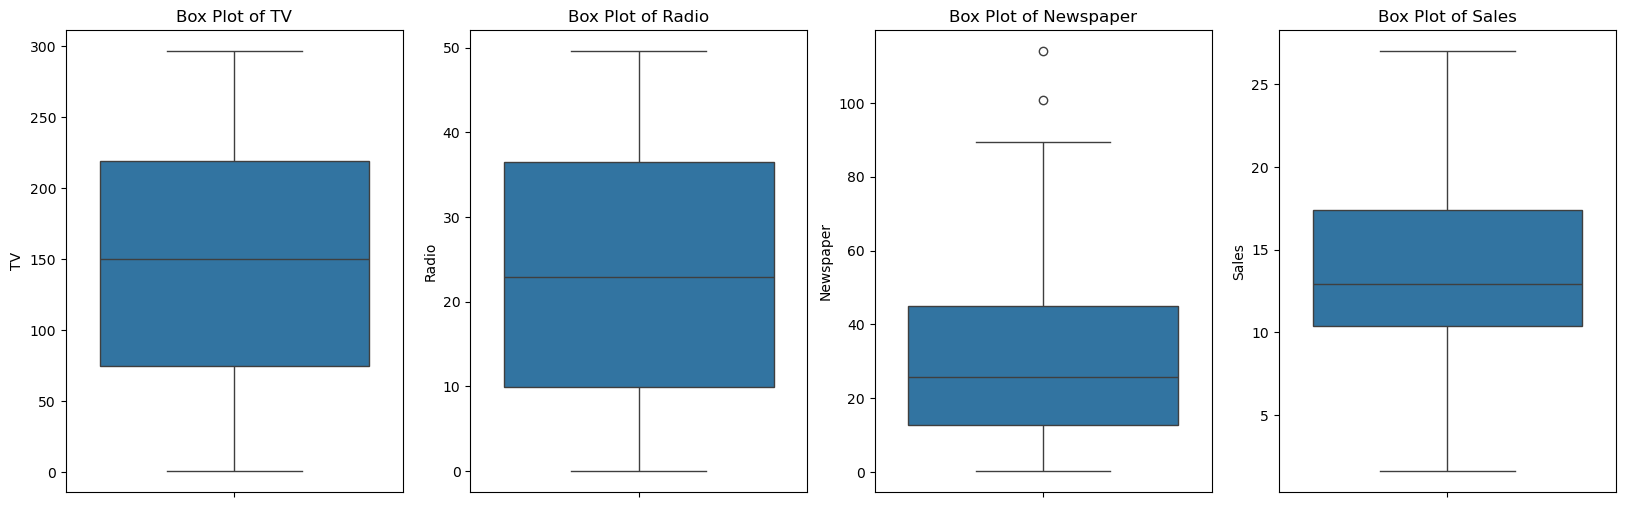

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
sns.boxplot(y=df.TV, ax=axes[0])
axes[0].set_title('Box Plot of TV')

sns.boxplot(df.Radio, ax=axes[1])
axes[1].set_title('Box Plot of Radio')

sns.boxplot(df.Newspaper, ax=axes[2])
axes[2].set_title('Box Plot of Newspaper')

sns.boxplot(df.Sales, ax=axes[3])
axes[3].set_title('Box Plot of Sales')

plt.show()

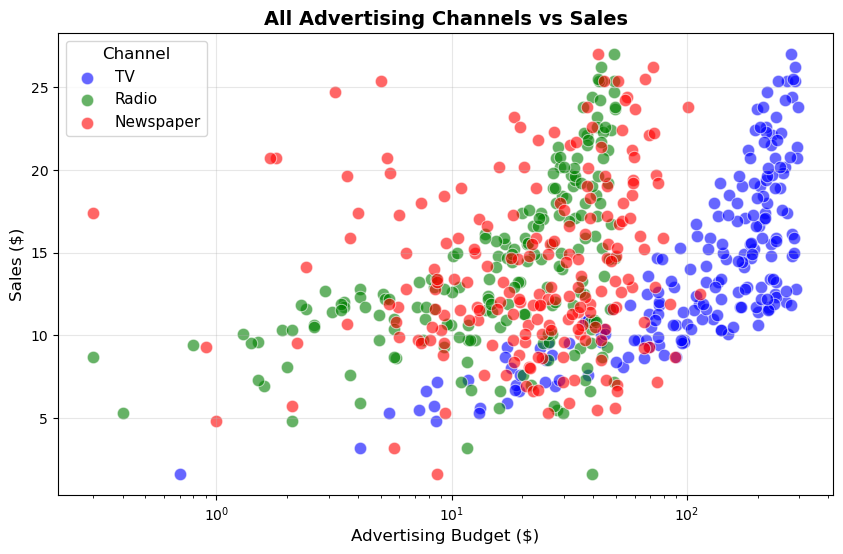

In [12]:
# scatterplot of advertizing channels vs sales to show the relation.
# its show in logscale for better comparison.


plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x="TV", y="Sales", color='blue', alpha=0.6, s=80, label='TV')
sns.scatterplot(data=df, x="Radio", y="Sales", color='green', alpha=0.6, s=80, label='Radio')
sns.scatterplot(data=df, x="Newspaper", y="Sales", color='red', alpha=0.6, s=80, label='Newspaper')

plt.xlabel('Advertising Budget ($)', fontsize=12)
plt.xscale("log")
plt.ylabel('Sales ($)', fontsize=12)
plt.title('All Advertising Channels vs Sales', fontsize=14, fontweight='bold')
plt.legend(title='Channel', fontsize=11, title_fontsize=12)
plt.grid(True, alpha=0.3)

plt.show()

## 02. Matrix analysis and dimensionality reduction

### Tasks:
+ Calculate **covariance matirx** for advertizing cost
+ Extracting **eigenvalues** and **eigenvectors**
+ Perform **SVD analysis on normalized data** and interpret the results (showing the proportion of variance explained by each principal component)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize

In [15]:
df = pd.read_csv("advertising_Dataset.csv")


In [16]:
df_advertizing_cost = df[['TV', 'Radio', 'Newspaper']]
cov_df = df_advertizing_cost.cov()
print('covariance of dataset: \n', cov_df)

covariance of dataset: 
                     TV       Radio   Newspaper
TV         7370.949893   69.862492  105.919452
Radio        69.862492  220.427743  114.496979
Newspaper   105.919452  114.496979  474.308326


In [17]:
eigenvalues, eigenvectors = np.linalg.eig(cov_df)
print('eigen values : \n', eigenvalues)
print('------------------------------------------------------------------------')
print('eigen vectors : \n', eigenvectors)

eigen values : 
 [7373.2933766   516.07662595  176.31595901]
------------------------------------------------------------------------
eigen vectors : 
 [[ 0.99982947  0.01807077  0.00380577]
 [ 0.01001377 -0.35736234 -0.93391214]
 [ 0.01551648 -0.93379098  0.35748236]]


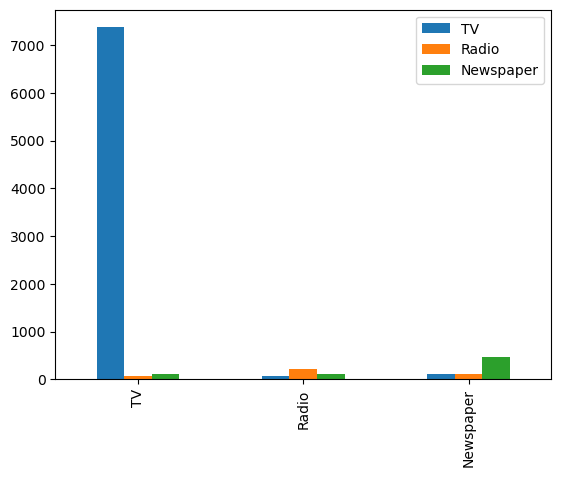

In [18]:
cov_df.plot(kind='bar')
plt.show()

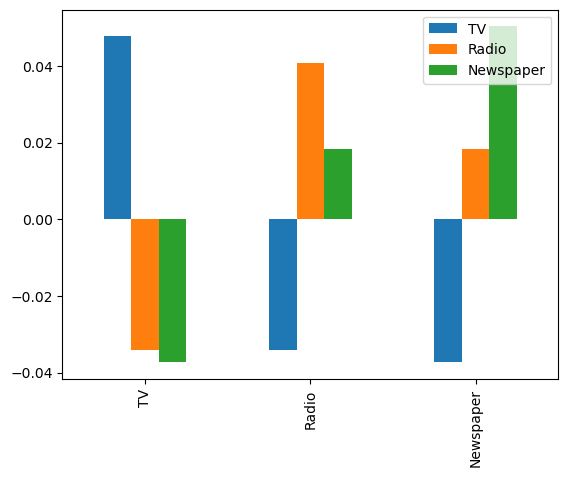

In [20]:
normalize_df = pd.DataFrame(normalize(df_advertizing_cost),
                            columns= ['TV', 'Radio', 'Newspaper'])
normalize_cov_df = normalize_df.cov()
normalize_cov_df.plot(kind='bar')
plt.show()

In [21]:
print(cov_df)

print('-------------------------------------------------------------------------')

print(normalize_cov_df)

                    TV       Radio   Newspaper
TV         7370.949893   69.862492  105.919452
Radio        69.862492  220.427743  114.496979
Newspaper   105.919452  114.496979  474.308326
-------------------------------------------------------------------------
                 TV     Radio  Newspaper
TV         0.047773 -0.034170  -0.037359
Radio     -0.034170  0.040826   0.018226
Newspaper -0.037359  0.018226   0.050284


In [22]:
eigenvalues_n, eigenvectors_n = np.linalg.eig(normalize_cov_df)
print('eigen values : \n', eigenvalues_n)
print('------------------------------------------------------------------------')
print('eigen vectors : \n', eigenvectors_n)

eigen values : 
 [0.10730484 0.00448759 0.02709055]
------------------------------------------------------------------------
eigen vectors : 
 [[ 0.6475684  -0.75706871  0.08661486]
 [-0.49230179 -0.50241636 -0.71078601]
 [-0.58163057 -0.4176419   0.69805524]]


In [23]:
U, S, VT = np.linalg.svd(normalize_df, full_matrices=False) 

In [24]:
explained_variance_ratio = (S**2) / np.sum(S**2)
explained_variance_ratio


array([0.87957215, 0.09384284, 0.02658502])

PC (Principal Component) is the linear combination of TV, Radio, and Newspaper that captures the maximum variance in advertising spending. It represents the dominant pattern of variation in the dataset.


PC1 : %88

PC2 : %9

PC3 : %3

## 03_Linear_regression_modeling

### Tasks :
+ Forming a linear model ( $sales = \beta_0 + \beta_1 * TV  + \beta_2 * Radio + \beta_3 * Newspaper$ )
+ Model fitting using the least squares method by solving a system of linear equations (using matrix inverse or pseudo-inverse using SVD)
+ Extracting statistical results
    + Model coefficients
    + T-Test
    + P-values


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
from scipy.linalg import svd


In [49]:
df = pd.read_csv("advertising_Dataset.csv")


In [35]:
# بردار خروجی
y = df['Sales'].values.reshape(-1, 1)   # (n×1)

# ماتریس ویژگی‌ها
X = df[['TV', 'Radio', 'Newspaper']].values  # (n×3)

# اضافه کردن ستون 1 برای intercept
X = np.c_[np.ones(X.shape[0]), X]   # (n×4)


In [36]:
U, S, VT = np.linalg.svd(X, full_matrices=False)


In [37]:
# ساخت Sigma معکوس
S_inv = np.diag(1 / S)

# شبه معکوس X
X_pinv = VT.T @ S_inv @ U.T


In [38]:
beta = X_pinv @ y
beta


array([[ 2.93888937e+00],
       [ 4.57646455e-02],
       [ 1.88530017e-01],
       [-1.03749304e-03]])

In [39]:
y_hat = X @ beta          # پیش‌بینی
residuals = y - y_hat     # خطاها


In [40]:
n, p = X.shape
sigma2 = (residuals.T @ residuals) / (n - p)
sigma2 = sigma2.item()


Covariance

In [41]:
XtX_inv = VT.T @ np.diag(1 / S**2) @ VT
cov_beta = sigma2 * XtX_inv


T-Test

In [42]:
std_errors = np.sqrt(np.diag(cov_beta)).reshape(-1, 1)
t_stats = beta / std_errors
t_stats


array([[ 9.42228844],
       [32.80862443],
       [21.89349606],
       [-0.17671459]])

P-value

In [46]:

dfree = n - p
p_values = 2 * (1 - t.cdf(np.abs(t_stats), df=dfree))
p_values


array([[0.        ],
       [0.        ],
       [0.        ],
       [0.85991505]])

In [47]:
results = pd.DataFrame({
    "Coefficient": beta.flatten(),
    "Std Error": std_errors.flatten(),
    "t-stat": t_stats.flatten(),
    "p-value": p_values.flatten()
}, index=["Intercept", "TV", "Radio", "Newspaper"])

results

,Coefficient,Std Error,t-stat,p-value
Intercept,2.938889,0.311908,9.422288,0.000000
TV,0.045765,0.001395,32.808624,0.000000
Radio,0.188530,0.008611,21.893496,0.000000
Newspaper,-0.001037,0.005871,-0.176715,0.859915


## 04ـ Bayesian reasoning
### Tasks :

    Define "high sales" as sales that are above the median sales.
    Calculate the number of high-sales cases,
    update the prior distribution (Beta distribution with initial parameters 1 and 1) based on the obtained data, and estimate the posterior mean probability of high-sales occurrence.



In [50]:
df = pd.read_csv("advertising_Dataset.csv")

In [51]:
sales_mean = df['Sales'].mean()
high_sales = (df['Sales'] > sales_mean).astype(int)


In [52]:
n = len(high_sales)
k = high_sales.sum()

n, k


(200, np.int64(89))

Beta(1, 1)

In [53]:
alpha_prior = 1
beta_prior = 1


In [54]:
alpha_post = alpha_prior + k
beta_post = beta_prior + (n - k)


امید ریاضی احتمال فروش بالا

In [55]:
posterior_mean = alpha_post / (alpha_post + beta_post)
posterior_mean


np.float64(0.44554455445544555)

واریانس احتمال فروش بالا

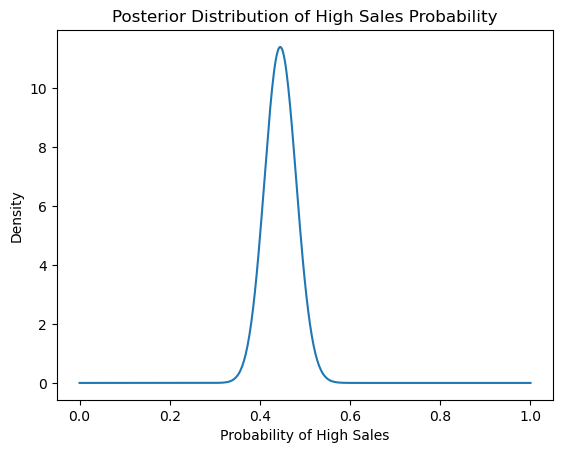

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

x = np.linspace(0, 1, 500)
y = beta.pdf(x, alpha_post, beta_post)

plt.figure()
plt.plot(x, y)
plt.title("Posterior Distribution of High Sales Probability")
plt.xlabel("Probability of High Sales")
plt.ylabel("Density")
plt.show()